In this project our main objective is the prediction of a used mercedes car sale price using a dataset uploaded on Kaggle

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
filepath = 'data\mercedes.csv'
data = pd.read_csv(filepath, sep = ',')

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
data.shape

(13119, 9)

Our dataset includes 13119 different cars. The columns are the following
* model: The specific model of the mercedes car
* year: The year that the exact model was produced
* price: The sale price of the car
* transmission: Whether the car is automatic, semi-automatic or manual
* mileage: The miles that the car have covered
* fuelType: Whether the car is petrol, diesel or hybrid
* tax: The amount of yearly taxes for the car
* mpg: The average consumption of the car
* engineSize: The car's size of the engine

#### Data exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


##### Let's check our data to clean them from unwanted values

In [6]:
data.model.value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
200              1
180              1
230              1
220              1
Name: model, dtype: int64

In [7]:
false_val = ['230', '220', '200', '180']
mask = data.model.isin(false_val)

data.drop(data[mask].index, inplace = True)
data.reset_index(drop = True, inplace = True)

##### Now let's remove the space in the first position

In [8]:
for i,name in enumerate( data.model):
    data.model[i] = data.model[i][1:]

<ipython-input-8-6e0afb55b8f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.model[i] = data.model[i][1:]


In [9]:
data.model.value_counts() ##

C Class      3747
A Class      2561
E Class      1953
GLC Class     960
GLA Class     847
B Class       591
CL Class      511
GLE Class     461
SL CLASS      260
CLS Class     237
V Class       207
S Class       197
GL Class      121
SLK            95
CLA Class      86
X-CLASS        82
M Class        79
GLS Class      74
GLB Class      19
G Class        15
CLK             7
CLC Class       3
R Class         2
Name: model, dtype: int64

Since we have only 9 rows with unknown data (7 for fuelType and 2 for transmission), we will simply get rid of them. If there were more like them we would have replaced them propably with the most frequent value in each category

In [10]:
data.fuelType.value_counts()

Diesel    9184
Petrol    3751
Hybrid     173
Other        7
Name: fuelType, dtype: int64

In [11]:
data.transmission.value_counts()

Semi-Auto    6848
Automatic    4823
Manual       1442
Other           2
Name: transmission, dtype: int64

In [12]:
data.drop(data[data.fuelType == 'Other'].index, inplace = True)
data.drop(data[data.transmission == 'Other'].index, inplace = True)

data.reset_index(drop = True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13102,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13103,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13104,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13105,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


##### Let's check for outliers in the numeric values

In [13]:
data.select_dtypes(exclude = 'object').describe()

,year,price,mileage,tax,mpg,engineSize
count,13107.000000,13107.000000,13107.000000,13107.000000,13107.000000,13107.000000
mean,2017.297704,24704.293126,21930.547112,129.996567,55.116915,2.071839
std,2.223310,11843.318730,21162.425203,65.144152,15.093603,0.572034
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6078.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15181.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31729.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


One extreme value here is the maximum mpg but as we see below it is justified since it is for a new model where the fuelType is hybrid.

In [14]:
data[data.mpg==max(data.mpg)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6205,C Class,2019,34890,Semi-Auto,1139,Hybrid,135,217.3,2.0


In [15]:
'{} cars with wrong engine size'.format(data[data.engineSize == 0].model.count())

'10 cars with wrong engine size'

There are also 10 cars with 0 engine size which can't be possible. Since there are just a few cars compared to the whole dataset we will also get rid of them

In [16]:
data.drop(data[data.engineSize == 0].index, inplace = True)
data.reset_index(drop = True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13092,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13093,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13094,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13095,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


#### Our next step is to model our data as to estimate the price we should put to a new added car for sale

#### Firstly we will try to estimate a simple linear regression model

In [17]:
estimate = 'price'
X = data.drop(estimate, axis = 1)
Y = data[estimate]

In [18]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,Automatic,4000,Petrol,325,30.1,4.0


In [19]:
Y.head()

0     5200
1    34948
2    49948
3    61948
4    73948
Name: price, dtype: int64

#### We have to convert all the categorical variables into numerical using get_dummies function from pandas

In [20]:
categories = X.select_dtypes(include = 'object')

In [21]:
dummies = pd.get_dummies(categories)

In [22]:
X1 = pd.concat([X.drop(categories.columns, axis = 1), dummies], axis = 1)
X1.head()

,year,mileage,tax,mpg,engineSize,model_A Class,model_B Class,model_C Class,model_CL Class,model_CLA Class,...,model_SL CLASS,model_SLK,model_V Class,model_X-CLASS,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2005,63000,325,32.1,1.8,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,2017,27000,20,61.4,2.1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2016,6200,555,28.0,5.5,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,2016,16000,325,30.4,4.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2016,4000,325,30.1,4.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Finally we have 34 features to estimate our model.

#### For each of our models we will use the cross validation technique to split our dataset into a train and test set multiple times

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

For our linear regression model we don't need to scale our features.

In [24]:
lr = LinearRegression()
r2_scores = cross_val_score(lr, X1, Y, cv = 5)
MSE_scores = cross_val_score(lr, X1, Y, scoring = 'neg_mean_squared_error', cv = 5)

'The average score for our linear regression model using cross validation is: {} and the RMSE: {}'.format(round(np.mean(r2_scores),3),
                                                                                                         round(np.sqrt(-np.mean(MSE_scores)), 1))

'The average score for our linear regression model using cross validation is: 0.722 and the RMSE: 5859.2'

Now what r2 score will we get if we increase the degree of the Features?

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=72018, shuffle=True)

pf = PolynomialFeatures(degree = 2, include_bias = False)
X1_pf = pf.fit_transform(X1)

s = StandardScaler()
lr1 = LinearRegression()

score_test = []
score_train = []

for train_index, test_index in kf.split(X1):

    x_train, x_test, y_train, y_test = (X1_pf[train_index,:],
                                        X1_pf[test_index,:],
                                        Y.iloc[train_index],
                                        Y.iloc[test_index]   )

    x_train_s = s.fit_transform(x_train)
    lr1.fit(x_train_s, y_train)
    
    x_test_s = s.transform(x_test)
    y_predict = lr1.predict(x_test_s)
        
    score_test.append(round(r2_score(y_predict, y_test),3))
    score_train.append(round(r2_score(lr1.predict(x_train_s), y_train),3))
    
print('test scores: ', score_test)
print('train scores: ', score_train)

print("mean test scores: ", np.mean(score_test))
print("mean train scores: ", round(np.mean(score_train),2))

test scores:  [-0.001, -0.0, -0.0, -0.0, -0.0]
train scores:  [0.915, 0.917, 0.923, 0.913, 0.913]
mean test scores:  -0.0002
mean train scores:  0.92


As we can see above, using a 2nd degree polynomial for our model, we have really low test scores but also really high train scores. We also have very large coefficients. These are signs of an overfitted model.

In [26]:
'There are {} non zero coefficients and the average value of them is: {} '.format(np.sum(lr1.coef_!=0),np.mean(abs(lr1.coef_)))

'There are 366 non zero coefficients and the average value of them is: 519217935858514.44 '

Let's also calculate our Linear Model predictions on random test data

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.3, random_state=42)
lr.fit(x_train, y_train)
y_predict_LR = lr.predict(x_test)
r2_score(y_predict_LR, y_test)

0.6861432514816705

#### Our next step is to regularize our model using Lasso, Ridge and Elastic Net and compare the results

##### Let's try Ridge Regression first

In [28]:
from sklearn.linear_model import RidgeCV

Y1 = data[[estimate]]
alphas = [1e02, 1e-1, 1e0, 1e1, 1.5e1, 2e1, 3e1, 1e2]

x_train, x_test, y_train, y_test = train_test_split(X1_pf, Y1, test_size = 0.3, random_state=42)

x_train_s = s.fit_transform(x_train)

rr = RidgeCV(alphas = alphas , cv = 5).fit(x_train_s, y_train)

ridge_alpha = rr.alpha_    
ridge_score = rr.best_score_

In [29]:
'For alpha = {} we achieved a score of : {}'.format(ridge_alpha , round(ridge_score, 3))

'For alpha = 1.0 we achieved a score of : 0.876'

In [30]:
'There are also {} non zero coefficients.'.format(np.sum(rr.coef_!=0))

'There are also 330 non zero coefficients.'

In [31]:
y_pred_ridge = rr.predict(s.transform(x_test))
print("Ridge r2 score using the test set: ", round(r2_score(y_pred_ridge,y_test),3), " and RMSE: ", 
      round(np.sqrt(mean_squared_error(y_pred_ridge,y_test)),1))

Ridge r2 score using the test set:  0.88  and RMSE:  4074.6


##### Let's try Lasso Regression now.

In [32]:
from sklearn.linear_model import LassoCV

alphas = [1e0, 1e1, 1.5e1, 3e1, 5e1]

las = LassoCV(alphas = alphas , cv = 5, max_iter = 100000, tol = 1e-3).fit(x_train_s, y_train)

lasso_alpha = las.alpha_    

c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
'For alpha = {} we have {} non zero coefficients.'.format(lasso_alpha , np.sum(las.coef_!=0))

'For alpha = 30.0 we have 115 non zero coefficients.'

In [34]:
y_pred_las = las.predict(s.transform(x_test))
print("Lasso r2 score using the test set: ", round(r2_score(y_pred_las,y_test),3), " and RMSE: ", 
      round(np.sqrt(mean_squared_error(y_pred_las,y_test)),1))

Lasso r2 score using the test set:  0.866  and RMSE:  4039.9


In [35]:
pfNames = pf.get_feature_names(X1.columns)
features_coef = pd.DataFrame(data = zip(pfNames, las.coef_)).rename(columns={0:'Feature',1:'Coefficient'})
features_coef.sort_values(by='Coefficient')

,Feature,Coefficient
134,mpg engineSize,-9345.173070
194,model_A Class^2,-5436.686058
71,mileage engineSize,-4995.541197
103,tax engineSize,-1916.346068
220,model_A Class fuelType_Diesel,-1573.912845
...,...,...
153,mpg model_S Class,2277.997541
34,year^2,2694.907540
133,mpg^2,5635.153990
165,engineSize model_A Class,6291.430423


##### Finally let's try elastic Net

In [36]:
from sklearn.linear_model import ElasticNetCV

alphas = [1e-2, 1e-1, 1e0, 1e1]

ratios = np.linspace(0.1, 0.9, 9)
ENCV = ElasticNetCV(alphas = alphas, l1_ratio = ratios, max_iter = 1e5, cv = 5, tol = 1e-2).fit(x_train_s, y_train)

EN_alpha = ENCV.alpha_
EN_l1ratio = ENCV.l1_ratio_

c:\users\dionisis\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
'Cross Validation in Elastic Net chose alpha: {} , and l1_ratio: {}'.format(EN_alpha, EN_l1ratio)

'Cross Validation in Elastic Net chose alpha: 0.01 , and l1_ratio: 0.9'

In [38]:
y_pred_ENCV = ENCV.predict(s.transform(x_test))
print("Elastic Net r2 score using the test set: ",round(r2_score(y_pred_ENCV,y_test),3), " and RMSE: ", 
      round(np.sqrt(mean_squared_error(y_pred_ENCV,y_test)),1))

Elastic Net r2 score using the test set:  0.883  and RMSE:  3961.4


#### Plots

(Text(0.5, 1.0, 'Elastic Net Regression'), Text(0.5, 0, 'Predicted Value'))

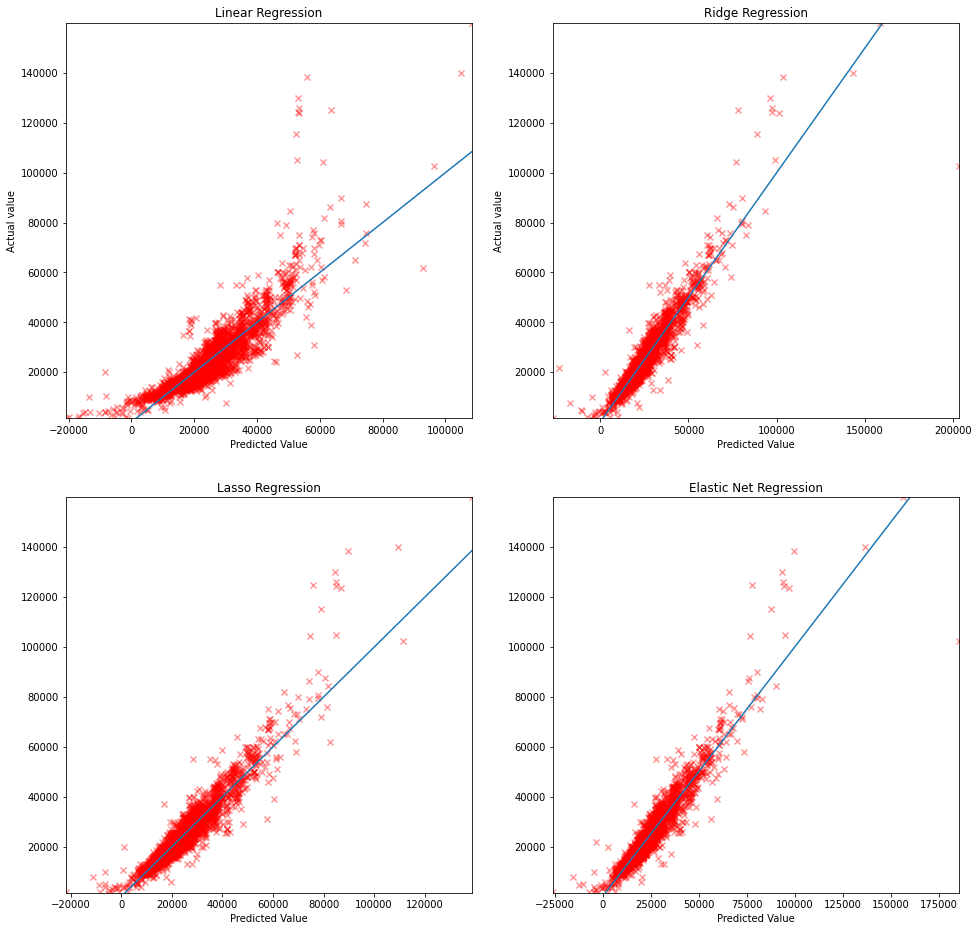

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
line = np.linspace(-10000, 200000, 2)

#Linear
ax[0,0].scatter(y_predict_LR, y_test, alpha = 0.4, c = 'red', marker = 'x')
ax[0,0].plot(line, line)
ax[0,0].set_xlim(np.min(y_predict_LR),np.max(y_predict_LR)), ax[0,0].set_ylim(np.min(y_test.values),np.max(y_test.values))
ax[0,0].set_title('Linear Regression'), ax[0,0].set_xlabel('Predicted Value'), ax[0,0].set_ylabel('Actual value')

#Ridge
ax[0,1].scatter(y_pred_ridge, y_test, alpha = 0.4, c = 'red', marker = 'x')
ax[0,1].plot(line, line)
ax[0,1].set_xlim(np.min(y_pred_ridge),np.max(y_pred_ridge)), ax[0,1].set_ylim(np.min(y_test.values),np.max(y_test.values))
ax[0,1].set_title('Ridge Regression'), ax[0,1].set_xlabel('Predicted Value'), ax[0,1].set_ylabel('Actual value')

#Lasso
ax[1,0].scatter(y_pred_las, y_test, alpha = 0.4, c = 'red', marker = 'x')
ax[1,0].plot(line, line)
ax[1,0].set_xlim(np.min(y_pred_las),np.max(y_pred_las)), ax[1,0].set_ylim(np.min(y_test.values),np.max(y_test.values))
ax[1,0].set_title('Lasso Regression'), ax[1,0].set_xlabel('Predicted Value')#, ax2.set_ylabel('Actual value')

#Elastic Net
ax[1,1].scatter(y_pred_ENCV, y_test, alpha = 0.4, c = 'red', marker = 'x')
ax[1,1].plot(line, line)
ax[1,1].set_xlim(np.min(y_pred_ENCV),np.max(y_pred_ENCV)), ax[1,1].set_ylim(np.min(y_test.values),np.max(y_test.values))
ax[1,1].set_title('Elastic Net Regression'), ax[1,1].set_xlabel('Predicted Value')#, ax3.set_ylabel('Actual value')


In [40]:
final = pd.DataFrame(data = [[round(np.mean(r2_scores),3),
                              round(np.sqrt(-np.mean(MSE_scores)), 1)],
                             [round(r2_score(y_pred_ridge,y_test),3),
                              round(np.sqrt(mean_squared_error(y_pred_ridge,y_test)),1)],
                             [round(r2_score(y_pred_las,y_test),3),
                              round(np.sqrt(mean_squared_error(y_pred_las,y_test)),1)],
                             [round(r2_score(y_pred_ENCV,y_test),3),
                              round(np.sqrt(mean_squared_error(y_pred_ENCV,y_test)),1)]]).rename(columns={0:'r2 score',
                                                                                                    1:'RMSE'},
                                                                                           index={0:'Linear Regression',
                                                                                                  1:'Ridge Regression',
                                                                                                  2:'Lasso Regression',
                                                                                                  3:'Elastic Net Regression'})
final

,r2 score,RMSE
Linear Regression,0.722,5859.2
Ridge Regression,0.880,4074.6
Lasso Regression,0.866,4039.9
Elastic Net Regression,0.883,3961.4


As we saw before, our best model is propably the Elastic Net model with alpha: 0.01 , and l1_ratio: 0.9

We can also see from the scatter plots that there are plenty of outliers. This might be because for some type of cars we have just a few data available. We could also use PolynomialFeatures with a higher degree but the time complexity for our algorithms would become extremely high and that war the reason why I avoided that.

In order to increase the performance of our model, we will need to acquire more data and definetely more features such as:
* The condition of the car
* The type of the car (sedan, coupe, cabrio etc..)
* The wheel-drive (fwd, rwd, 4wd)